In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
X_train=pd.read_csv('./Logistic_X_Train.csv').values
Y_train=pd.read_csv('./Logistic_Y_Train.csv').values

def hypothesis(x,w,b):
    z=np.dot(x,w)+b
    return sigmoid(z)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b):
    err=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    
    return -err/m

def get_grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)
    
    grad_w/=m
    grad_b/=m
    
    return [grad_w,grad_b]

def gradient_descent(y_true,x,w,b,learning_rate=0.1):
        err=error(y_true,x,w,b)
        [grad_w,grad_b]=get_grads(y_true,x,w,b)
        w=w+learning_rate*grad_w
        b=b+learning_rate*grad_b
        return err,w,b
def predict(xtest,w,b):
    confidence=hypothesis(xtest,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def accuracy(xtest,ytest,w,b):
    y_pred=[]
    for i in range(xtest.shape[0]):
        y_pred.append(predict(xtest[i],w,b))
    y_pred=np.array(y_pred)
    return float((ytest==y_pred).sum())/xtest.shape[0]


        

In [3]:
w=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()
loss=[]
acc=[]
for i in range(100):
    err,w,b=gradient_descent(Y_train,X_train,w,b,learning_rate=0.5)
    acc.append(accuracy(X_train,Y_train,w,b))
    loss.append(err)



In [4]:
print(loss)
print(acc)

[array([5.51315464]), array([4.63884452]), array([3.8081915]), array([3.01764019]), array([2.2697652]), array([1.59605394]), array([1.09565474]), array([0.82743457]), array([0.69014521]), array([0.60692758]), array([0.54939299]), array([0.50611938]), array([0.4717134]), array([0.44329014]), array([0.41915552]), array([0.39824097]), array([0.37983329]), array([0.36343429]), array([0.34868263]), array([0.33530791]), array([0.32310235]), array([0.31190265]), array([0.30157795]), array([0.29202163]), array([0.28314554]), array([0.27487588]), array([0.26715014]), array([0.25991491]), array([0.25312407]), array([0.24673758]), array([0.24072034]), array([0.23504147]), array([0.22967361]), array([0.22459239]), array([0.21977602]), array([0.21520492]), array([0.21086146]), array([0.20672966]), array([0.20279504]), array([0.19904439]), array([0.19546568]), array([0.19204787]), array([0.18878086]), array([0.18565536]), array([0.18266279]), array([0.17979526]), array([0.17704545]), array([0.174406

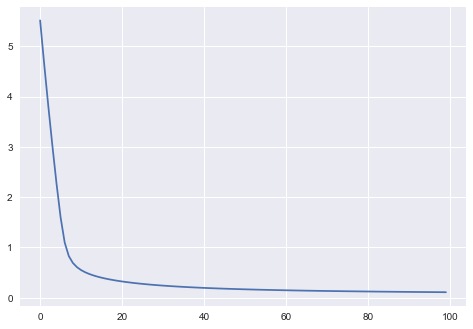

In [5]:
plt.style.use('seaborn')
plt.plot(loss)
plt.show()

In [6]:
X_test=pd.read_csv('./Logistic_X_Test.csv').values
Y_test=hypothesis(X_test,w,b)
for i in range(Y_test.shape[0]):
    if(Y_test[i]>0.5):
        Y_test[i]=1
    else:
        Y_test[i]=0
df=pd.DataFrame(data=Y_test,columns=["label"])
df.to_csv('y_logistic_pred.csv',index=False)

In [7]:
print(w)

[-1.82878561  0.92820568 -2.15477489]


In [8]:
print(X_train.shape)

(3000, 3)
